### Importação de Bibliotecas

In [21]:
import pandas as pd
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

### Leitura e Ajustes na Base

In [22]:
df_fumo = pd.read_csv('dados/fumo.csv')

In [23]:
df_fumo.head()

,id,UF,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Está grávida?,"Atualmente, fuma algum produto do tabaco?","E no passado, fumou algum produto do tabaco?",...,Com que frequência alguém fuma dentro do seu domicílio?,"Nos últimos trinta dias, viu alguma propaganda ou anúncio de cigarros nos pontos de venda de cigarros?","Nos últimos 30 dias, viu alguma propaganda ou anúncio de cigarros na internet, incluindo redes sociais?",Viu ou ouviu informações nos jornais ou revistas?,Viu ou ouviu informações na televisão?,Viu ou ouviu informações no rádio?,"Viu ou ouviu informações na internet, incluindo redes sociais?","Nos últimos trinta dias, viu alguma foto ou advertência sobre os riscos de fumar nos maços de cigarros?","Nos últimos 30 dias, as advertências nos maços de cigarro que viu o levaram a pensar em parar de fumar?",Total de dias que parou de fumar
0,0,RO,71.91,1,1,60.0,145.0,2.0,3.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,7300.0
1,9,RO,71.91,1,1,65.0,152.0,2.0,1.0,NaN,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
2,10,RO,71.91,1,1,77.0,155.0,2.0,3.0,1.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,9125.0
3,18,RO,71.91,1,1,56.0,159.0,2.0,3.0,3.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
4,19,RO,71.91,1,1,55.0,176.0,2.0,3.0,3.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN


In [24]:
df_fumo.shape

(90846, 32)

In [25]:
df_fumo['Viu ou ouviu informações em veiculos de comunicação'] = df_fumo[['Viu ou ouviu informações nos jornais ou revistas?',
       'Viu ou ouviu informações na televisão?',
       'Viu ou ouviu informações no rádio?',
       'Viu ou ouviu informações na internet, incluindo redes sociais?']].apply(
    lambda row: 1 if (row == 1).any() else 2, axis=1)
df_fumo

,id,UF,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Está grávida?,"Atualmente, fuma algum produto do tabaco?","E no passado, fumou algum produto do tabaco?",...,"Nos últimos trinta dias, viu alguma propaganda ou anúncio de cigarros nos pontos de venda de cigarros?","Nos últimos 30 dias, viu alguma propaganda ou anúncio de cigarros na internet, incluindo redes sociais?",Viu ou ouviu informações nos jornais ou revistas?,Viu ou ouviu informações na televisão?,Viu ou ouviu informações no rádio?,"Viu ou ouviu informações na internet, incluindo redes sociais?","Nos últimos trinta dias, viu alguma foto ou advertência sobre os riscos de fumar nos maços de cigarros?","Nos últimos 30 dias, as advertências nos maços de cigarro que viu o levaram a pensar em parar de fumar?",Total de dias que parou de fumar,Viu ou ouviu informações em veiculos de comunicação
0,0,RO,71.91,1,1,60.0,145.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,7300.0,2
1,9,RO,71.91,1,1,65.0,152.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1
2,10,RO,71.91,1,1,77.0,155.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,9125.0,2
3,18,RO,71.91,1,1,56.0,159.0,2.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2
4,19,RO,71.91,1,1,55.0,176.0,2.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,DF,78.85,2,1,63.0,168.0,2.0,1.0,NaN,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1
90842,293712,DF,78.85,2,1,72.0,168.0,NaN,1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2
90843,293713,DF,78.85,2,1,87.0,163.0,2.0,3.0,1.0,...,1.0,2.0,1.0,2.0,3.0,1.0,1.0,NaN,3650.0,1
90844,293718,DF,78.85,2,1,89.0,168.0,NaN,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,1


In [26]:
df_fumo = df_fumo.drop(columns = ['Está grávida?','Nos últimos doze meses, durante algum atendimento, por médico ou outro profissional de saúde, foi perguntado se fumava?', 'Durante os últimos doze meses, quando tentou parar de fumar, usou aconselhamento por profissional de saúde incluindo unidades de saúde que oferecem tratamento para parar de fumar?', 'Pagou algum valor por esse aconselhamento?', 'Durante os últimos 12 meses, quando tentou parar de fumar, usou medicamento(s) que auxilia( m) as pessoas no processo de deixar de fumar?', 'Pagou algum valor por esse(s) medicamento(s)?', 'Algum medicamento foi obtido em serviço público de saúde?', 'Durante os últimos 12 meses, por que não usou nem aconselhamento nem medicamento para tentar parar de fumar?',  'Nos últimos trinta dias, viu alguma propaganda ou anúncio de cigarros nos pontos de venda de cigarros?', 'Nos últimos 30 dias, viu alguma propaganda ou anúncio de cigarros na internet, incluindo redes sociais?', 'Nos últimos trinta dias, viu alguma foto ou advertência sobre os riscos de fumar nos maços de cigarros?', 'Nos últimos 30 dias, as advertências nos maços de cigarro que viu o levaram a pensar em parar de fumar?', 'Que idade tinha quando começou a fumar produto de tabaco diariamente?', 'Total de dias que parou de fumar', 'Viu ou ouviu informações nos jornais ou revistas?', 'Viu ou ouviu informações na televisão?', 'Viu ou ouviu informações no rádio?', 'Viu ou ouviu informações na internet, incluindo redes sociais?', 'E no passado, fumou algum produto do tabaco?', 'Esse aconselhamento foi feito pelo SUS?', 'Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?'])

In [27]:
df_corr = df_fumo.drop(columns = ['UF'])

In [28]:
df_corr['Atualmente, fuma algum produto do tabaco?'] = df_corr['Atualmente, fuma algum produto do tabaco?'].replace({1: 'Sim, diariamente', 2: 'Sim, menos que diariamente', 3: 'Não fumo atualmente'})
df_corr['Durante os últimos doze meses, tentou parar de fumar?'] = df_corr['Durante os últimos doze meses, tentou parar de fumar?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?'] = df_corr['Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?'].replace({1: 'Sim, diariamente', 2: 'Sim, menos do que diariamente', 3: 'Não, mas já usei no passado', 4: 'Nunca usei'})
df_corr['Com que frequência alguém fuma dentro do seu domicílio?'] = df_corr['Com que frequência alguém fuma dentro do seu domicílio?'].replace({1: 'Diariamente', 2: 'Semanalmente', 3: 'Mensalmente', 4: 'Menos que mensalmente', 5: 'Nunca'})
df_corr['Viu ou ouviu informações em veiculos de comunicação'] = df_corr['Viu ou ouviu informações em veiculos de comunicação'].replace({1: 'Sim', 2: 'Não'})

df_dummies1 = pd.get_dummies(df_corr['Atualmente, fuma algum produto do tabaco?'], prefix='fuma_tabaco')
df_dummies2 = pd.get_dummies(df_corr['Durante os últimos doze meses, tentou parar de fumar?'], prefix='tentou_parar')
df_dummies3 = pd.get_dummies(df_corr['Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?'], prefix='nicotina_liquida_folha_tabaco')
df_dummies4 = pd.get_dummies(df_corr['Com que frequência alguém fuma dentro do seu domicílio?'], prefix='familiar_fuma_domicilio?')
df_dummies5 = pd.get_dummies(df_corr['Viu ou ouviu informações em veiculos de comunicação'], prefix='viu_propagandas?')

df_dummies = pd.concat([df_corr, df_dummies1], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies2], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies3], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies4], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies5], axis=1)

df_dummies.drop(columns = ['Atualmente, fuma algum produto do tabaco?',
'Durante os últimos doze meses, tentou parar de fumar?',
'Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?',
'Com que frequência alguém fuma dentro do seu domicílio?',
'Viu ou ouviu informações em veiculos de comunicação'], inplace = True)

df_dummies


,id,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,fuma_tabaco_Não fumo atualmente,"fuma_tabaco_Sim, diariamente","fuma_tabaco_Sim, menos que diariamente",tentou_parar_Não,...,"nicotina_liquida_folha_tabaco_Não, mas já usei no passado","nicotina_liquida_folha_tabaco_Sim, diariamente","nicotina_liquida_folha_tabaco_Sim, menos do que diariamente",familiar_fuma_domicilio?_Diariamente,familiar_fuma_domicilio?_Menos que mensalmente,familiar_fuma_domicilio?_Mensalmente,familiar_fuma_domicilio?_Nunca,familiar_fuma_domicilio?_Semanalmente,viu_propagandas?_Não,viu_propagandas?_Sim
0,0,71.91,1,1,60.0,145.0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,9,71.91,1,1,65.0,152.0,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,10,71.91,1,1,77.0,155.0,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,18,71.91,1,1,56.0,159.0,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,19,71.91,1,1,55.0,176.0,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,78.85,2,1,63.0,168.0,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
90842,293712,78.85,2,1,72.0,168.0,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
90843,293713,78.85,2,1,87.0,163.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
90844,293718,78.85,2,1,89.0,168.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [29]:
df_dummies.to_csv('bases_agrupadas/fumo.csv')

### Matriz de Correlação

<Axes: >

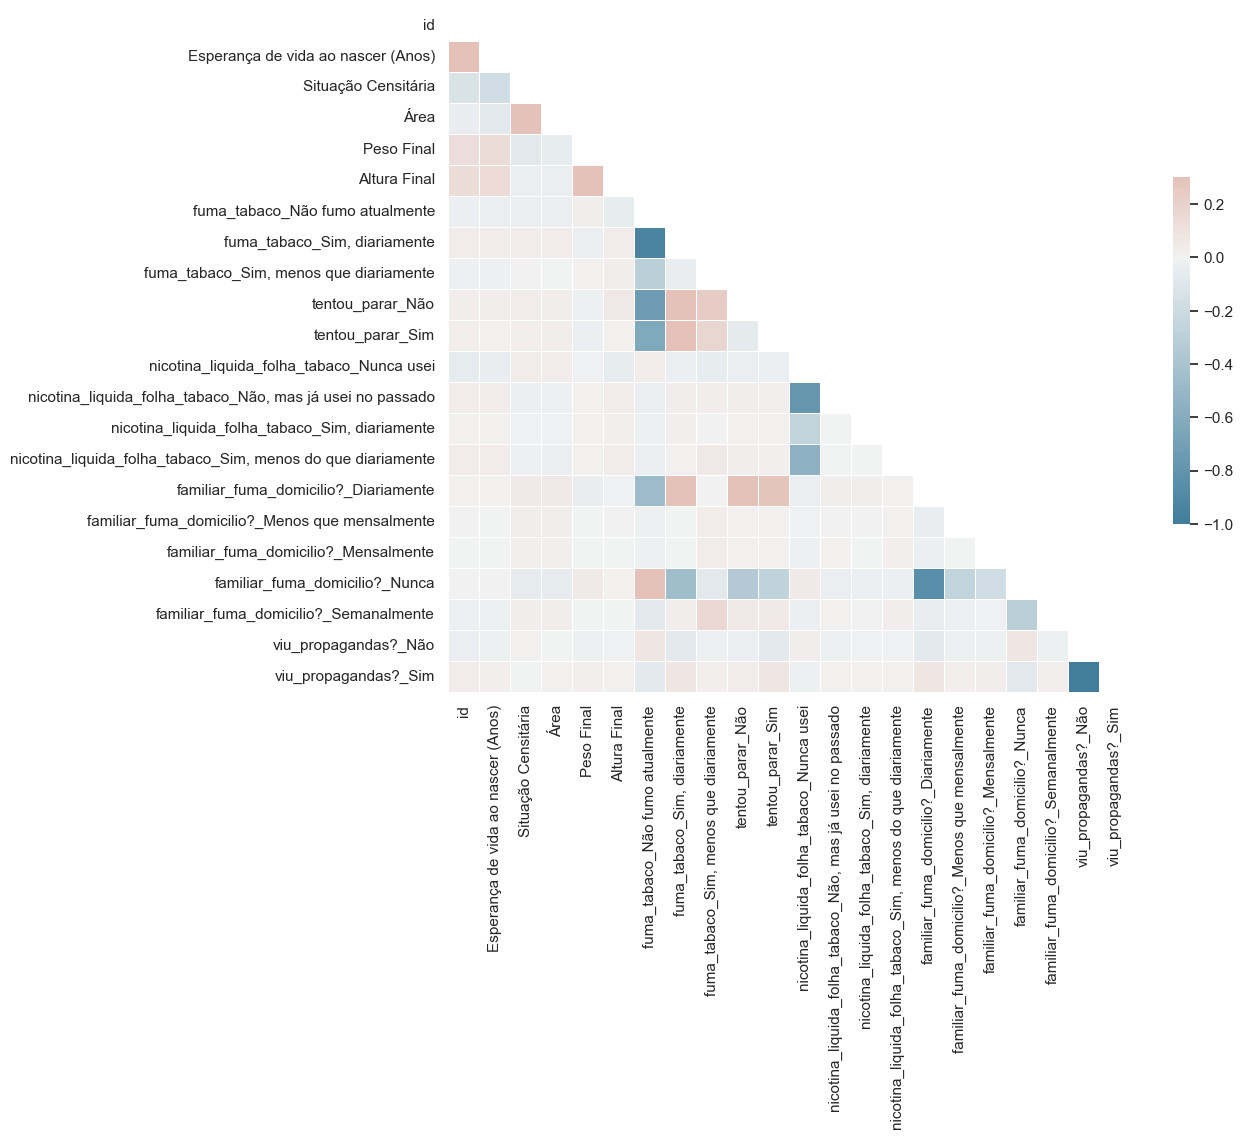

In [9]:
sns.set_theme(style="white")

# df_dummies.drop(columns = ['id'], inplace = True)
 
# Compute the correlation matrix
corr = df_dummies.corr()
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            # , annot=True, fmt=".2f"
            )

### Cálculos de Base

In [30]:
uf_fumo = df_fumo.groupby(['UF', 'Atualmente, fuma algum produto do tabaco?']).size().unstack(fill_value=0)
uf_fumo

"Atualmente, fuma algum produto do tabaco?",1.0,2.0,3.0
UF,,,
AC,307,32,2041
AL,302,27,2658
AM,309,79,3091
AP,132,53,1369
BA,304,46,3309
CE,473,51,3741
DF,227,41,2097
ES,350,39,3152
GO,344,27,2331


In [31]:
uf_tentou_parar = df_fumo.groupby(['UF', 'Durante os últimos doze meses, tentou parar de fumar?']).size().unstack(fill_value=0)
uf_tentou_parar

"Durante os últimos doze meses, tentou parar de fumar?",1.0,2.0
UF,,
AC,136,203
AL,156,173
AM,153,235
AP,78,107
BA,164,186
CE,198,326
DF,113,155
ES,175,214
GO,148,223


In [32]:
uf_nicotina_liquida_folha_tabaco = df_fumo.groupby(['UF', 'Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?']).size().unstack(fill_value=0)
uf_nicotina_liquida_folha_tabaco

Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?,1.0,2.0,3.0,4.0
UF,,,,
AC,1,1,7,2371
AL,5,2,17,2963
AM,1,1,9,3468
AP,0,2,1,1551
BA,0,5,10,3644
CE,2,3,10,4250
DF,7,36,42,2280
ES,0,3,11,3527
GO,1,17,24,2660


In [33]:
uf_freq_domicilio = df_fumo.groupby(['UF', 'Com que frequência alguém fuma dentro do seu domicílio?']).size().unstack(fill_value=0)
uf_freq_domicilio

Com que frequência alguém fuma dentro do seu domicílio?,1.0,2.0,3.0,4.0,5.0
UF,,,,,
AC,328,28,9,13,2002
AL,336,60,10,25,2556
AM,310,63,19,41,3046
AP,146,37,10,20,1341
BA,314,59,24,50,3212
CE,631,84,16,43,3491
DF,237,31,7,30,2060
ES,374,54,11,29,3073
GO,418,44,19,56,2165


### Mapas

#### Utilizando Matplotlib - visualização separada dos gráficos

In [34]:
malha = gpd.read_file(r'dados\uf.json', encoding='ISO-8859-1')
malha = malha.set_index('UF_05')

In [35]:
uf_fumo[4] = uf_fumo[1] + uf_fumo[2]
uf_fumo['total'] = uf_fumo[1] + uf_fumo[2] + uf_fumo[3]
uf_fumo['proporcao_fumantes'] = uf_fumo[4] / uf_fumo['total']

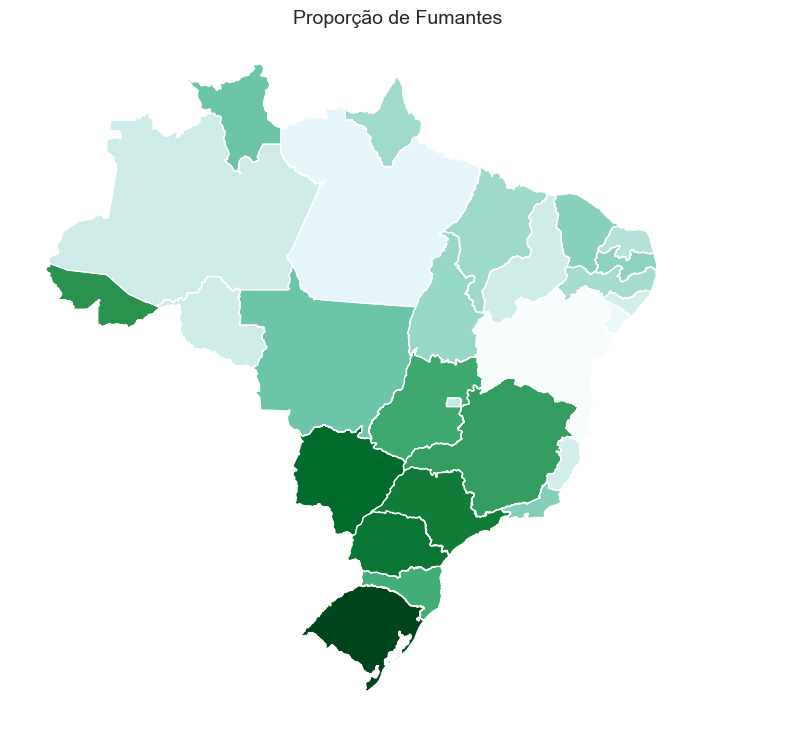

In [ ]:
uf_fumo_indice = uf_fumo.reset_index()
uf_fumo_mapa = malha.join(uf_fumo_indice.set_index('UF'))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uf_fumo_mapa.plot(
    column='proporcao_fumantes',
    ax=ax,
    cmap='BuGn'
)

ax.set_title("Proporção de Fumantes", fontsize=14)
ax.axis('off')

plt.show()

In [36]:
uf_tentou_parar['total'] = uf_tentou_parar[1] + uf_tentou_parar[2]
uf_tentou_parar['proporcao_tentou_parar'] = uf_tentou_parar[1] / uf_tentou_parar['total']

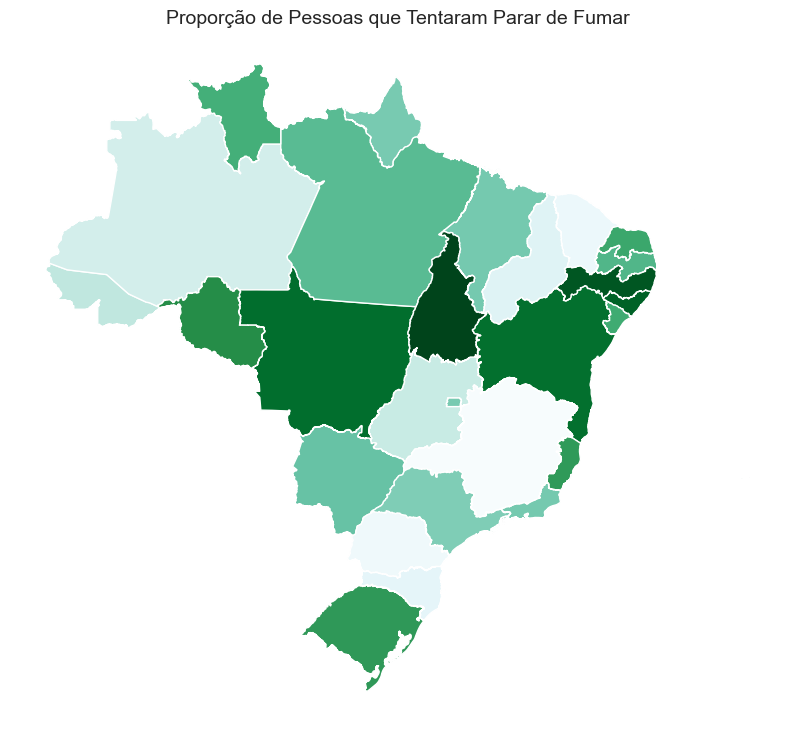

In [ ]:
uf_tentou_parar_indice = uf_tentou_parar.reset_index()
uf_tentou_parar_mapa = malha.join(uf_tentou_parar_indice.set_index('UF'))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uf_tentou_parar_mapa.plot(
    column='proporcao_tentou_parar',
    ax=ax,
    cmap='BuGn'
)

ax.set_title("Proporção de Pessoas que Tentaram Parar de Fumar", fontsize=14)
ax.axis('off')

plt.show()

In [37]:
uf_nicotina_liquida_folha_tabaco[5] = uf_nicotina_liquida_folha_tabaco[1] + uf_nicotina_liquida_folha_tabaco[2]
uf_nicotina_liquida_folha_tabaco[6] = uf_nicotina_liquida_folha_tabaco[3] + uf_nicotina_liquida_folha_tabaco[4]
uf_nicotina_liquida_folha_tabaco['total'] = uf_nicotina_liquida_folha_tabaco[5] + uf_nicotina_liquida_folha_tabaco[6]
uf_nicotina_liquida_folha_tabaco['proporcao_uso_nicotina_tabaco'] = uf_nicotina_liquida_folha_tabaco[5] / uf_nicotina_liquida_folha_tabaco['total']

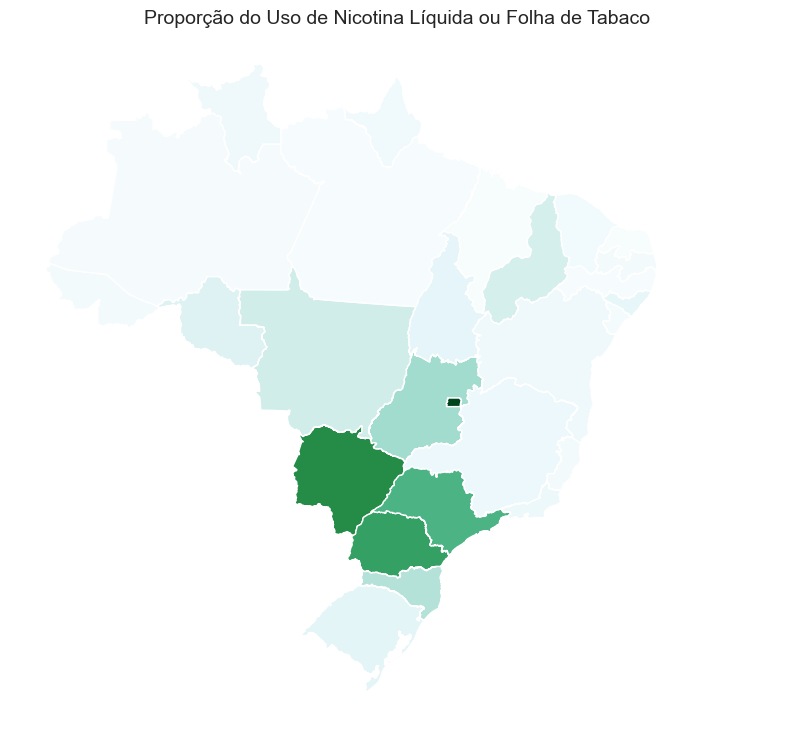

In [ ]:
uf_nicotina_liquida_folha_tabaco_indice = uf_nicotina_liquida_folha_tabaco.reset_index()
uf_nicotina_liquida_folha_tabaco_mapa = malha.join(uf_nicotina_liquida_folha_tabaco_indice.set_index('UF'))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uf_nicotina_liquida_folha_tabaco_mapa.plot(
    column='proporcao_uso_nicotina_tabaco',
    ax=ax,
    cmap='BuGn'
)

ax.set_title("Proporção do Uso de Nicotina Líquida ou Folha de Tabaco", fontsize=14)
ax.axis('off')

plt.show()

In [38]:
uf_freq_domicilio[6] = uf_freq_domicilio[1] + uf_freq_domicilio[2] + uf_freq_domicilio[3]
uf_freq_domicilio[7] = uf_freq_domicilio[4] + uf_freq_domicilio[5]
uf_freq_domicilio['total'] = uf_freq_domicilio[6] + uf_freq_domicilio[7]
uf_freq_domicilio['proporcao_freq_domicilio'] = uf_freq_domicilio[6] / uf_freq_domicilio['total']

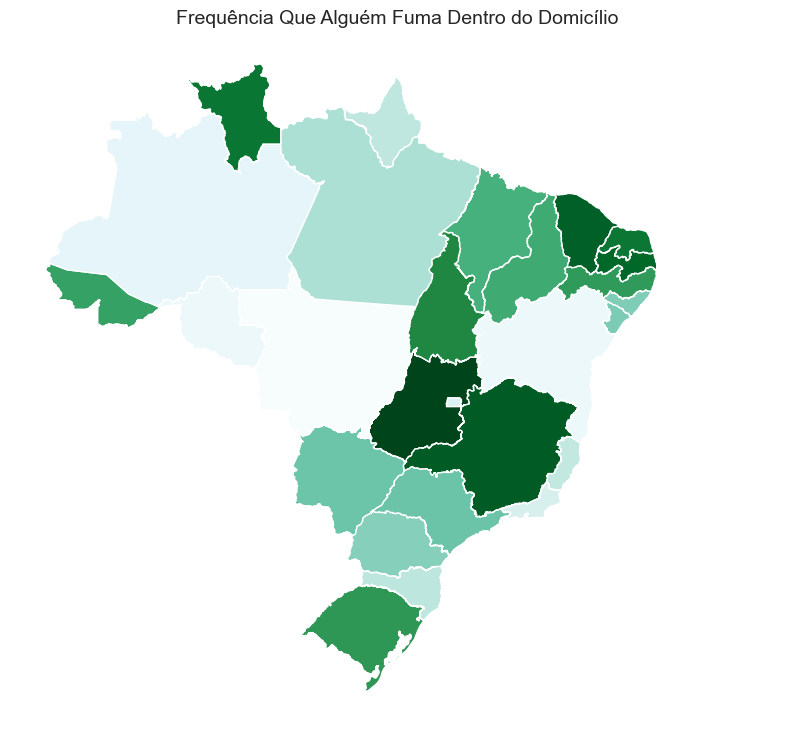

In [ ]:
uf_freq_domicilio_indice = uf_freq_domicilio.reset_index()
uf_freq_domicilio_mapa = malha.join(uf_freq_domicilio_indice.set_index('UF'))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uf_freq_domicilio_mapa.plot(
    column='proporcao_freq_domicilio',
    ax=ax,
    cmap='BuGn'
)

ax.set_title("Frequência Que Alguém Fuma Dentro do Domicílio", fontsize=14)
ax.axis('off')

plt.show()

#### Mosaico dos Mapas

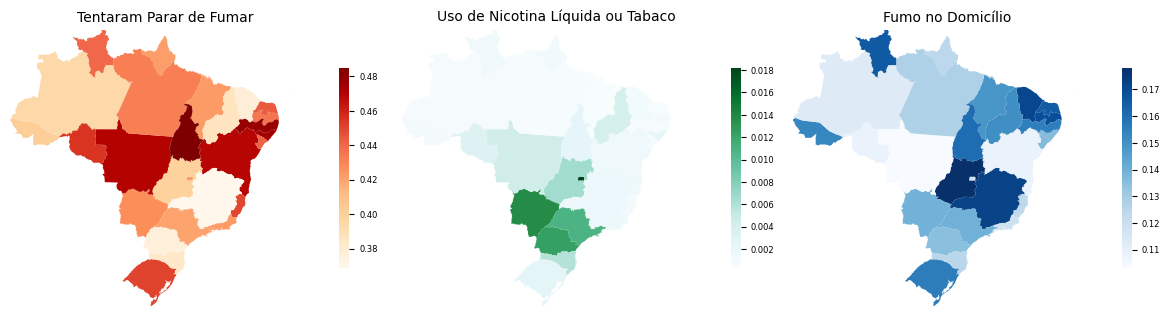

In [39]:
# Layout 1x3
fig, axes = plt.subplots(1, 3, figsize=(11.7, 4.2))

# Lista com dados, colunas, títulos e colormaps distintos
graficos = [
    (uf_tentou_parar.reset_index(), 'proporcao_tentou_parar', 'Tentaram Parar de Fumar', 'OrRd'),
    (uf_nicotina_liquida_folha_tabaco.reset_index(), 'proporcao_uso_nicotina_tabaco', 'Uso de Nicotina Líquida ou Tabaco', 'BuGn'),
    (uf_freq_domicilio.reset_index(), 'proporcao_freq_domicilio', 'Fumo no Domicílio', 'Blues')
]

# Geração dos mapas
for ax, (df, coluna, titulo, cmap) in zip(axes, graficos):
    mapa = malha.join(df.set_index('UF'))
    
    mapa.plot(
        column=coluna,
        ax=ax,
        cmap=cmap,
        legend=True,
        legend_kwds={
            'shrink': 0.5,
            'orientation': 'vertical'
        }
    )

    ax.set_title(titulo, fontsize=10)
    ax.axis('off')

    # Ajuste da legenda
    cbar = ax.get_figure().axes[-1]
    cbar.tick_params(labelsize=6)
    for spine in cbar.spines.values():
        spine.set_visible(False)
    
    ax.margins(0)

plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0, wspace=0.01, hspace=0.1)
plt.savefig('imagens/mapas_fumo.pdf', transparent=True)
plt.show()


### Cálculo de Proporção - Notas

In [ ]:
notas = pd.DataFrame(df_fumo['UF'].unique())
notas = notas.rename(columns={0: 'UF'})

def calcular_nota_pergunta(
    df_pergunta,
    col_pergunta=None,
    nome_nota='nota',
    df_notas=None,
    tipo='maior_melhor',  # opções: 'maior_melhor', 'menor_melhor', 'intermediario_melhor', 'proporcao_nao_melhor'
    col_sim=None,
    col_nao=None
):
    # Caso 4: Proporção de respostas (sim/não)
    if tipo == 'proporcao_nao_melhor':
        proporcao_nao = df_pergunta[col_nao] / (df_pergunta[col_sim] + df_pergunta[col_nao])
        valores = proporcao_nao

    else:
        valores = pd.to_numeric(df_pergunta[col_pergunta], errors='coerce')

    # Aplica fórmula de nota conforme o tipo
    if tipo == 'maior_melhor':
        min_val = valores.min()
        max_val = valores.max()
        nota = 1 + 4 * ((valores - min_val) / (max_val - min_val))

    elif tipo == 'menor_melhor':
        min_val = valores.min()
        max_val = valores.max()
        nota = 5 - 4 * ((valores - min_val) / (max_val - min_val))

    elif tipo == 'intermediario_melhor':
        media = valores.mean()
        distancia = abs((valores - media))
        max_dist = distancia.max()
        nota = 5 - 4 * (distancia / max_dist)

    elif tipo == 'proporcao_nao_melhor':
        min_val = valores.min()
        max_val = valores.max()
        nota = 1 + 4 * ((valores - min_val) / (max_val - min_val))

    df_pergunta[nome_nota] = nota
    df_merged = pd.merge(df_notas, df_pergunta[['UF', nome_nota]], on='UF', how='inner')

    return df_merged

In [ ]:
notas = calcular_nota_pergunta(
    df_pergunta = uf_fumo.reset_index(),
    nome_nota ='fuma_tabaco',
    df_notas = notas,
    tipo = 'proporcao_nao_melhor',
    col_sim = 4,
    col_nao = 1
)

In [ ]:
notas = calcular_nota_pergunta(
    df_pergunta = uf_tentou_parar.reset_index(),
    nome_nota ='tentou_parar_fumar',
    df_notas = notas,
    tipo = 'proporcao_nao_melhor',
    col_sim = 1,
    col_nao = 2
)

In [ ]:
notas = calcular_nota_pergunta(
    df_pergunta = uf_nicotina_liquida_folha_tabaco.reset_index(),
    nome_nota ='nicotina_liquida_folha_tabaco',
    df_notas = notas,
    tipo = 'proporcao_nao_melhor',
    col_sim = 5,
    col_nao = 6
)

In [ ]:
notas = calcular_nota_pergunta(
    df_pergunta = uf_freq_domicilio.reset_index(),
    nome_nota ='fumo_em_domicilio',
    df_notas = notas,
    tipo = 'proporcao_nao_melhor',
    col_sim = 5,
    col_nao = 6
)

In [ ]:
notas.to_csv(r'dados/notas_fumo.csv', index=False)